#Setup and Import Libraries

In [ ]:
# Import necessary libraries
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Check if GPU is available
device = ("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained VGG19 model
model = models.vgg19(pretrained=True).features
for p in model.parameters():
    p.requires_grad = False
model.to(device)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

#Define Model Activation Function

In [ ]:
# Function to extract activations from the model
def model_activations(input, model):
    layers = {
        '0': 'conv1_1',
        '5': 'conv2_1',
        '10': 'conv3_1',
        '19': 'conv4_1',
        '21': 'conv4_2',
        '28': 'conv5_1'
    }
    features = {}
    x = input
    x = x.unsqueeze(0)
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x

    return features


#Image Transformation and Loading

In [ ]:
# Image transformation pipeline
transform = transforms.Compose([
    transforms.Resize(300),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load content and style images
content = Image.open("content.jpg").convert("RGB")
content = transform(content).to(device)
print("Content shape => ", content.shape)
style = Image.open("style.jpg").convert("RGB")
style = transform(style).to(device)


Content shape =>  torch.Size([3, 300, 533])


#Visualization Function and Display Images

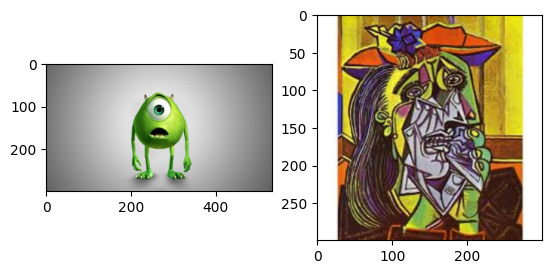

In [ ]:
# Function to convert PyTorch tensor to NumPy array for visualization
def imcnvt(image):
    x = image.to("cpu").clone().detach().numpy().squeeze()
    x = x.transpose(1, 2, 0)
    x = x * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    return np.clip(x, 0, 1)

# Display content and style images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(imcnvt(content), label="Content")
ax2.imshow(imcnvt(style), label="Style")
plt.show()


#Gram Matrix and Target Image Initialization

In [ ]:
# Function to compute Gram matrix
def gram_matrix(imgfeature):
    _, d, h, w = imgfeature.size()
    imgfeature = imgfeature.view(d, h * w)
    gram_mat = torch.mm(imgfeature, imgfeature.t())
    return gram_mat

# Initialize the target image for style transfer
target = content.clone().requires_grad_(True).to(device)

# Set device to cuda if available
print("Device = ", device)


style_features = model_activations(style,model)
content_features = model_activations(content,model)

Device =  cuda


#Style Weights and Loss Function Setup

In [ ]:
# Define style weights
style_wt_meas = {
    "conv1_1": 1.0,
    "conv2_1": 0.8,
    "conv3_1": 0.4,
    "conv4_1": 0.2,
    "conv5_1": 0.1
}

# Compute Gram matrices for style images
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# Define content and style weights
content_wt = 100
style_wt = 1e8


#Training Loop

Epoch  10   tensor(8.7823e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  20   tensor(7.0143e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  30   tensor(6.3705e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  40   tensor(5.9306e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  50   tensor(5.6398e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  60   tensor(5.4157e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  70   tensor(5.2419e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  80   tensor(5.1074e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  90   tensor(5.0009e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  100   tensor(4.9141e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  110   tensor(4.8411e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  120   tensor(4.7777e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  130   tensor(4.7213e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  140   tensor(4.6702e+18, device='cuda:0', grad_fn=<Ad

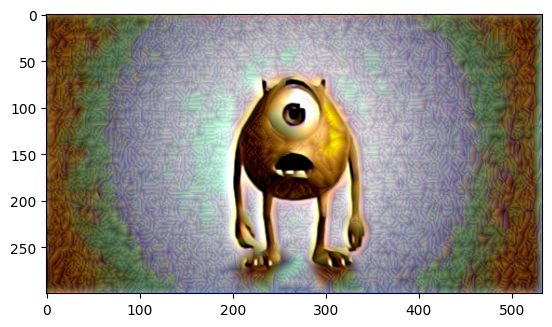

Epoch  510   tensor(3.9797e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  520   tensor(3.9739e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  530   tensor(3.9683e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  540   tensor(3.9631e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  550   tensor(3.9580e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  560   tensor(3.9532e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  570   tensor(3.9486e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  580   tensor(3.9442e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  590   tensor(3.9399e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  600   tensor(3.9358e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  610   tensor(3.9319e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  620   tensor(3.9281e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  630   tensor(3.9244e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  640   tensor(3.9208e+18, device='cuda:0', gr

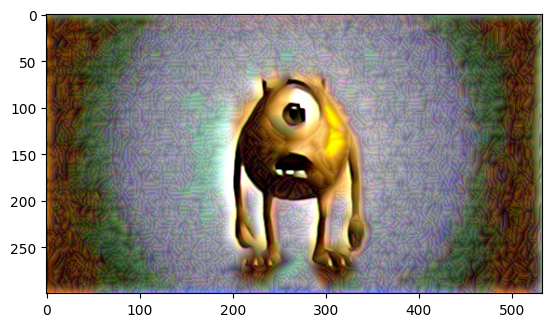

Epoch  1010   tensor(3.8364e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1020   tensor(3.8349e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1030   tensor(3.8334e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1040   tensor(3.8320e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1050   tensor(3.8306e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1060   tensor(3.8292e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1070   tensor(3.8279e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1080   tensor(3.8265e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1090   tensor(3.8252e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1100   tensor(3.8239e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1110   tensor(3.8226e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1120   tensor(3.8213e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1130   tensor(3.8201e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1140   tensor(3.8189e+18, devic

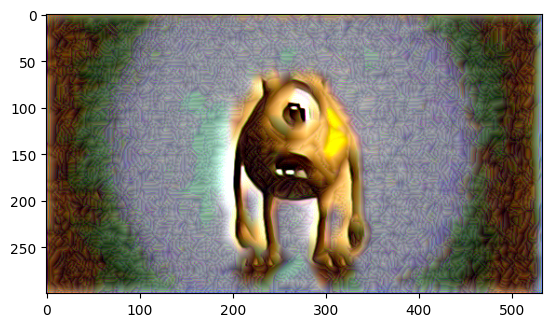

Epoch  1510   tensor(3.7869e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1520   tensor(3.7862e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1530   tensor(3.7856e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1540   tensor(3.7850e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1550   tensor(3.7844e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1560   tensor(3.7838e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1570   tensor(3.7832e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1580   tensor(3.7827e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1590   tensor(3.7821e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1600   tensor(3.7816e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1610   tensor(3.7810e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1620   tensor(3.7805e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1630   tensor(3.7799e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  1640   tensor(3.7794e+18, devic

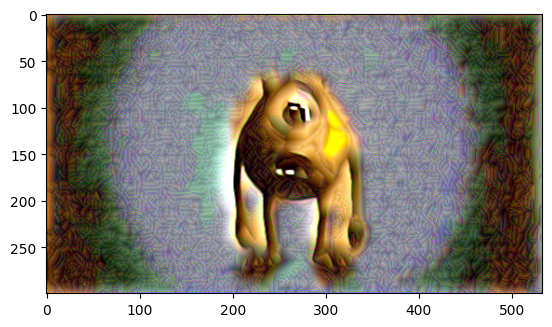

Epoch  2010   tensor(3.7621e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2020   tensor(3.7617e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2030   tensor(3.7614e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2040   tensor(3.7610e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2050   tensor(3.7606e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2060   tensor(3.7602e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2070   tensor(3.7599e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2080   tensor(3.7595e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2090   tensor(3.7591e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2100   tensor(3.7588e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2110   tensor(3.7584e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2120   tensor(3.7581e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2130   tensor(3.7577e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2140   tensor(3.7573e+18, devic

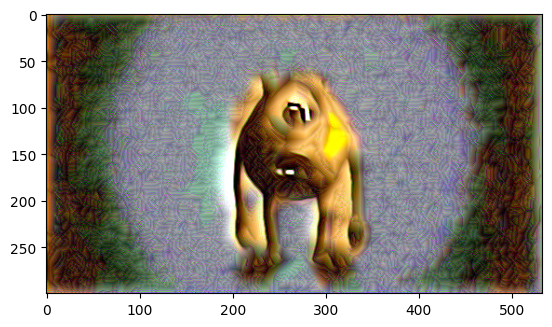

Epoch  2510   tensor(3.7467e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2520   tensor(3.7465e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2530   tensor(3.7462e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2540   tensor(3.7460e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2550   tensor(3.7458e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2560   tensor(3.7456e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2570   tensor(3.7454e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2580   tensor(3.7452e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2590   tensor(3.7450e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2600   tensor(3.7448e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2610   tensor(3.7446e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2620   tensor(3.7444e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2630   tensor(3.7442e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  2640   tensor(3.7440e+18, devic

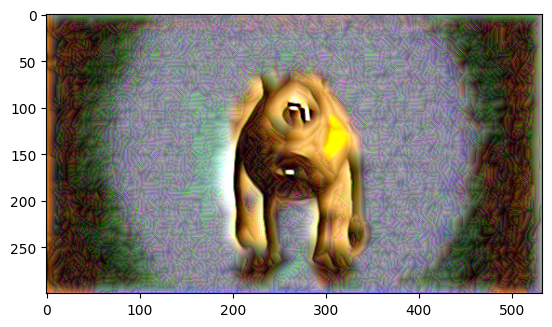

Epoch  3010   tensor(3.7379e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3020   tensor(3.7377e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3030   tensor(3.7376e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3040   tensor(3.7375e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3050   tensor(3.7374e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3060   tensor(3.7372e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3070   tensor(3.7371e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3080   tensor(3.7370e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3090   tensor(3.7368e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3100   tensor(3.7367e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3110   tensor(3.7365e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3120   tensor(3.7364e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3130   tensor(3.7363e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3140   tensor(3.7362e+18, devic

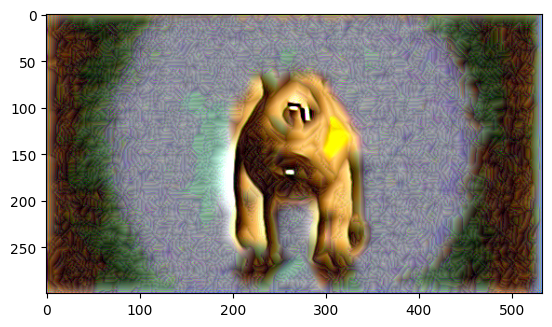

Epoch  3510   tensor(3.7319e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3520   tensor(3.7318e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3530   tensor(3.7317e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3540   tensor(3.7316e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3550   tensor(3.7315e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3560   tensor(3.7314e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3570   tensor(3.7313e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3580   tensor(3.7312e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3590   tensor(3.7311e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3600   tensor(3.7310e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3610   tensor(3.7309e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3620   tensor(3.7309e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3630   tensor(3.7308e+18, device='cuda:0', grad_fn=<AddBackward0>)
Epoch  3640   tensor(3.7307e+18, devic

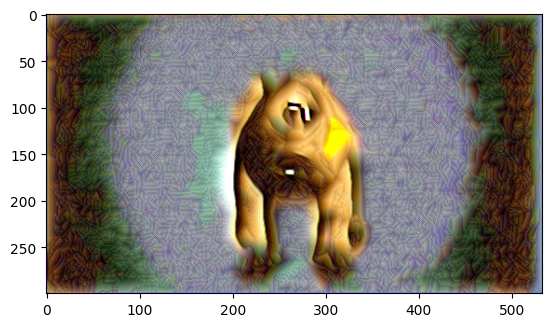

In [ ]:
# Set up display and save intervals
print_after = 500
epochs = 4000
optimizer = torch.optim.Adam([target], lr=0.007)

# Function to display images during training
def display_image(target, epoch):
    plt.imshow(imcnvt(target), label="Epoch " + str(epoch))
    plt.show()

# Training loop
for i in range(1, epochs + 1):
    target_features = model_activations(target, model)
    content_loss = torch.mean((content_features['conv4_2'] - target_features['conv4_2']) ** 2)

    style_loss = 0
    for layer in style_wt_meas:
        style_gram = style_grams[layer]
        target_gram = target_features[layer]
        _, d, w, h = target_gram.shape
        target_gram = gram_matrix(target_gram)
        style_loss += (style_wt_meas[layer] * torch.mean((target_gram - style_gram) ** 2)) / d * w * h

    total_loss = content_wt * content_loss + style_wt * style_loss

    if i % 10 == 0:
        print("Epoch ", i, " ", total_loss)

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if i % print_after == 0:
        display_image(target, i)
        plt.imsave(str(i) + '.png', imcnvt(target), format='png')


## Limitations and Potential Improvements

### Limitations

1. **Computational Resources:**
   - The process can be computationally intensive, leading to long training times or low-resolution outputs.

2. **Overfitting to Style Images:**
   - The model might struggle to generalize to styles significantly different from the training set.

3. **Hyperparameter Tuning:**
   - Manual tuning of hyperparameters is necessary and optimal values may vary for different content-style pairs.

4. **Content-Style Mismatch:**
   - The model may struggle with significant visual mismatches between content and style.

5. **Artifacts and Loss of Details:**
   - Neural style transfer may introduce artifacts or lose fine details from the content image.

### Potential Improvements

1. **Transfer Learning with Larger Datasets:**
   - Training on a larger and more diverse dataset could enhance generalization.

2. **Dynamic Hyperparameter Adjustment:**
   - Implementing dynamic hyperparameter adjustment during training could lead to more stable convergence.

3. **Generative Adversarial Networks (GANs):**
   - Combining style transfer with GANs might help generate more realistic and diverse stylized images.

4. **User Interaction and Control:**
   - Providing users with more control over the stylization process could enhance customization.

5. **Parallelization and Model Compression:**
   - Exploring methods for parallelization and model compression could make the model more accessible for deployment on devices with limited computational resources.

6. **Evaluation Metrics:**
   - Developing comprehensive evaluation metrics beyond visual inspection would provide a more objective measure of the model's performance.
